In [ ]:
import pandas as pd

# Load the Excel file from the specified path
file_path = "/content/Disease Symptoms and prediction dataset.xlsx"
df = pd.read_excel(file_path, engine='openpyxl')

# Show the first few rows
df.head()


,Disease,Fever,Cough,Fatigue,Difficulty Breathing,Age,Gender,Blood Pressure,Cholesterol Level,Outcome Variable,Precaution_1,Precaution_2,Precaution_3,Precaution_4
0,Influenza,Yes,No,Yes,Yes,19,Female,Low,Normal,Positive,Rest,Drink plenty of fluids,Take antiviral medication,Avoid close contact with others
1,Common Cold,No,Yes,Yes,No,25,Female,Normal,Normal,Negative,drink vitamin c rich drinks,take vapour,avoid cold food,keep fever in check
2,Eczema,No,Yes,Yes,No,25,Female,Normal,Normal,Negative,Moisturize regularly,Avoid allergens,Use medicated creams,Wear loose clothing
3,Asthma,Yes,Yes,No,Yes,25,Male,Normal,Normal,Positive,Use inhalers,Avoid triggers,Practice breathing exercises,Consult a pulmonologist
4,Asthma,Yes,Yes,No,Yes,25,Male,Normal,Normal,Positive,Use inhalers,Avoid triggers,Practice breathing exercises,Consult a pulmonologist


In [ ]:
# Check for missing/null values in the dataset
df.isnull().sum()


,0
Disease,0
Fever,0
Cough,0
Fatigue,0
Difficulty Breathing,0
Age,0
Gender,0
Blood Pressure,0
Cholesterol Level,0
Outcome Variable,0


In [ ]:
# Fill binary 'Yes/No' columns with their mode
binary_cols = ['Fever', 'Cough', 'Fatigue', 'Difficulty Breathing']
for col in binary_cols:
    df[col] = df[col].fillna(df[col].mode()[0])

# Fill numeric column 'Age' with median
df['Age'] = df['Age'].fillna(df['Age'].median())

# Fill categorical columns with mode
categorical_cols = ['Gender', 'Blood Pressure', 'Cholesterol Level', 'Disease',
                    'Precaution_1', 'Precaution_2', 'Precaution_3', 'Precaution_4']
for col in categorical_cols:
    df[col] = df[col].fillna(df[col].mode()[0])


In [ ]:
# Check if any column still has missing values
df.isnull().sum()


,0
Disease,0
Fever,0
Cough,0
Fatigue,0
Difficulty Breathing,0
Age,0
Gender,0
Blood Pressure,0
Cholesterol Level,0
Outcome Variable,0


In [ ]:
df.head()

,Disease,Fever,Cough,Fatigue,Difficulty Breathing,Age,Gender,Blood Pressure,Cholesterol Level,Outcome Variable,Precaution_1,Precaution_2,Precaution_3,Precaution_4
0,Influenza,Yes,No,Yes,Yes,19,Female,Low,Normal,Positive,Rest,Drink plenty of fluids,Take antiviral medication,Avoid close contact with others
1,Common Cold,No,Yes,Yes,No,25,Female,Normal,Normal,Negative,drink vitamin c rich drinks,take vapour,avoid cold food,keep fever in check
2,Eczema,No,Yes,Yes,No,25,Female,Normal,Normal,Negative,Moisturize regularly,Avoid allergens,Use medicated creams,Wear loose clothing
3,Asthma,Yes,Yes,No,Yes,25,Male,Normal,Normal,Positive,Use inhalers,Avoid triggers,Practice breathing exercises,Consult a pulmonologist
4,Asthma,Yes,Yes,No,Yes,25,Male,Normal,Normal,Positive,Use inhalers,Avoid triggers,Practice breathing exercises,Consult a pulmonologist


In [ ]:
# Columns to convert: Yes/No → 1/0
binary_cols = ['Fever', 'Cough', 'Fatigue', 'Difficulty Breathing']

# Convert Yes/No to 1/0
for col in binary_cols:
    df[col] = df[col].map({'Yes': 1, 'No': 0})

# Convert Outcome Variable: Positive → 1, Negative → 0
df['Outcome Variable'] = df['Outcome Variable'].map({'Positive': 1, 'Negative': 0})


In [ ]:
df.head()

,Disease,Fever,Cough,Fatigue,Difficulty Breathing,Age,Gender,Blood Pressure,Cholesterol Level,Outcome Variable,Precaution_1,Precaution_2,Precaution_3,Precaution_4
0,Influenza,1,0,1,1,19,Female,Low,Normal,1,Rest,Drink plenty of fluids,Take antiviral medication,Avoid close contact with others
1,Common Cold,0,1,1,0,25,Female,Normal,Normal,0,drink vitamin c rich drinks,take vapour,avoid cold food,keep fever in check
2,Eczema,0,1,1,0,25,Female,Normal,Normal,0,Moisturize regularly,Avoid allergens,Use medicated creams,Wear loose clothing
3,Asthma,1,1,0,1,25,Male,Normal,Normal,1,Use inhalers,Avoid triggers,Practice breathing exercises,Consult a pulmonologist
4,Asthma,1,1,0,1,25,Male,Normal,Normal,1,Use inhalers,Avoid triggers,Practice breathing exercises,Consult a pulmonologist


In [ ]:
# One-hot encode Gender, Blood Pressure, Cholesterol Level
df = pd.get_dummies(df, columns=['Gender', 'Blood Pressure', 'Cholesterol Level'], drop_first=True)


In [ ]:
df.columns


Index(['Disease', 'Fever', 'Cough', 'Fatigue', 'Difficulty Breathing', 'Age',
       'Outcome Variable', 'Precaution_1', 'Precaution_2', 'Precaution_3',
       'Precaution_4', 'Gender_Male', 'Blood Pressure_Low',
       'Blood Pressure_Normal', 'Cholesterol Level_Low',
       'Cholesterol Level_Normal'],
      dtype='object')

In [ ]:
df.head()

,Disease,Fever,Cough,Fatigue,Difficulty Breathing,Age,Outcome Variable,Precaution_1,Precaution_2,Precaution_3,Precaution_4,Gender_Male,Blood Pressure_Low,Blood Pressure_Normal,Cholesterol Level_Low,Cholesterol Level_Normal
0,Influenza,1,0,1,1,19,1,Rest,Drink plenty of fluids,Take antiviral medication,Avoid close contact with others,False,True,False,False,True
1,Common Cold,0,1,1,0,25,0,drink vitamin c rich drinks,take vapour,avoid cold food,keep fever in check,False,False,True,False,True
2,Eczema,0,1,1,0,25,0,Moisturize regularly,Avoid allergens,Use medicated creams,Wear loose clothing,False,False,True,False,True
3,Asthma,1,1,0,1,25,1,Use inhalers,Avoid triggers,Practice breathing exercises,Consult a pulmonologist,True,False,True,False,True
4,Asthma,1,1,0,1,25,1,Use inhalers,Avoid triggers,Practice breathing exercises,Consult a pulmonologist,True,False,True,False,True


In [ ]:
from sklearn.model_selection import train_test_split

# Drop columns that are not useful for training
X = df.drop(['Disease', 'Precaution_1', 'Precaution_2', 'Precaution_3', 'Precaution_4', 'Outcome Variable'], axis=1)

# Target variable
y = df['Outcome Variable']

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
df.head()

,Disease,Fever,Cough,Fatigue,Difficulty Breathing,Age,Outcome Variable,Precaution_1,Precaution_2,Precaution_3,Precaution_4,Gender_Male,Blood Pressure_Low,Blood Pressure_Normal,Cholesterol Level_Low,Cholesterol Level_Normal
0,Influenza,1,0,1,1,19,1,Rest,Drink plenty of fluids,Take antiviral medication,Avoid close contact with others,False,True,False,False,True
1,Common Cold,0,1,1,0,25,0,drink vitamin c rich drinks,take vapour,avoid cold food,keep fever in check,False,False,True,False,True
2,Eczema,0,1,1,0,25,0,Moisturize regularly,Avoid allergens,Use medicated creams,Wear loose clothing,False,False,True,False,True
3,Asthma,1,1,0,1,25,1,Use inhalers,Avoid triggers,Practice breathing exercises,Consult a pulmonologist,True,False,True,False,True
4,Asthma,1,1,0,1,25,1,Use inhalers,Avoid triggers,Practice breathing exercises,Consult a pulmonologist,True,False,True,False,True


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, classification_report, confusion_matrix, roc_auc_score


from sklearn.metrics import accuracy_score, precision_score
from sklearn.preprocessing import StandardScaler


In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [ ]:
models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "KNN": KNeighborsClassifier(),
    "SVM": SVC(),
    "Naive Bayes": GaussianNB(),
    "Gradient Boosting": GradientBoostingClassifier()
}


In [ ]:
# Model 1: Logistic Regression
from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression()
lr_model.fit(X_train_scaled, y_train)
y_pred_lr = lr_model.predict(X_test_scaled)
y_proba_lr = lr_model.predict_proba(X_test_scaled)[:, 1]

print("=== Logistic Regression ===")
print("Accuracy:", accuracy_score(y_test, y_pred_lr))
print("Precision:", precision_score(y_test, y_pred_lr))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_lr))
print("Classification Report:\n", classification_report(y_test, y_pred_lr))
print("ROC-AUC Score:", roc_auc_score(y_test, y_proba_lr))


=== Logistic Regression ===
Accuracy: 0.5714285714285714
Precision: 0.631578947368421
Confusion Matrix:
 [[16 14]
 [16 24]]
Classification Report:
               precision    recall  f1-score   support

           0       0.50      0.53      0.52        30
           1       0.63      0.60      0.62        40

    accuracy                           0.57        70
   macro avg       0.57      0.57      0.57        70
weighted avg       0.58      0.57      0.57        70

ROC-AUC Score: 0.6491666666666667


In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, classification_report, confusion_matrix, roc_auc_score

# Initialize the model
nb_model = GaussianNB()

# Train the model
nb_model.fit(X_train_scaled, y_train)

# Predict on test data
y_pred_nb = nb_model.predict(X_test_scaled)
y_proba_nb = nb_model.predict_proba(X_test_scaled)[:, 1]

# Evaluate the model
print("\n=== Naive Bayes ===")
print("Accuracy:", accuracy_score(y_test, y_pred_nb))
print("Precision:", precision_score(y_test, y_pred_nb))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_nb))
print("Classification Report:\n", classification_report(y_test, y_pred_nb))
print("ROC-AUC Score:", roc_auc_score(y_test, y_proba_nb))



=== Naive Bayes ===
Accuracy: 0.6285714285714286
Precision: 0.625
Confusion Matrix:
 [[ 9 21]
 [ 5 35]]
Classification Report:
               precision    recall  f1-score   support

           0       0.64      0.30      0.41        30
           1       0.62      0.88      0.73        40

    accuracy                           0.63        70
   macro avg       0.63      0.59      0.57        70
weighted avg       0.63      0.63      0.59        70

ROC-AUC Score: 0.6174999999999999


In [ ]:
# Model 2: SVM
from sklearn.svm import SVC

svm_model = SVC(probability=True)
svm_model.fit(X_train_scaled, y_train)
y_pred_svm = svm_model.predict(X_test_scaled)
y_proba_svm = svm_model.predict_proba(X_test_scaled)[:, 1]

print("=== Support Vector Machine ===")
print("Accuracy:", accuracy_score(y_test, y_pred_svm))
print("Precision:", precision_score(y_test, y_pred_svm))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_svm))
print("Classification Report:\n", classification_report(y_test, y_pred_svm))
print("ROC-AUC Score:", roc_auc_score(y_test, y_proba_svm))


=== Support Vector Machine ===
Accuracy: 0.6857142857142857
Precision: 0.75
Confusion Matrix:
 [[21  9]
 [13 27]]
Classification Report:
               precision    recall  f1-score   support

           0       0.62      0.70      0.66        30
           1       0.75      0.68      0.71        40

    accuracy                           0.69        70
   macro avg       0.68      0.69      0.68        70
weighted avg       0.69      0.69      0.69        70

ROC-AUC Score: 0.7758333333333334


In [ ]:
# Model 3: Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_scaled, y_train)
y_pred_rf = rf_model.predict(X_test_scaled)
y_proba_rf = rf_model.predict_proba(X_test_scaled)[:, 1]

print("=== Random Forest Classifier ===")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Precision:", precision_score(y_test, y_pred_rf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))
print("Classification Report:\n", classification_report(y_test, y_pred_rf))
print("ROC-AUC Score:", roc_auc_score(y_test, y_proba_rf))


=== Random Forest Classifier ===
Accuracy: 0.8857142857142857
Precision: 0.9210526315789473
Confusion Matrix:
 [[27  3]
 [ 5 35]]
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.90      0.87        30
           1       0.92      0.88      0.90        40

    accuracy                           0.89        70
   macro avg       0.88      0.89      0.88        70
weighted avg       0.89      0.89      0.89        70

ROC-AUC Score: 0.90125


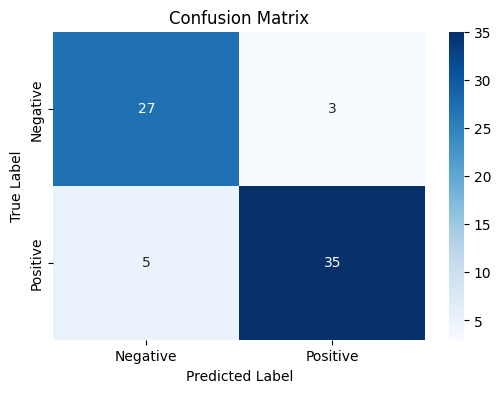

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred_rf)

# Plot the heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


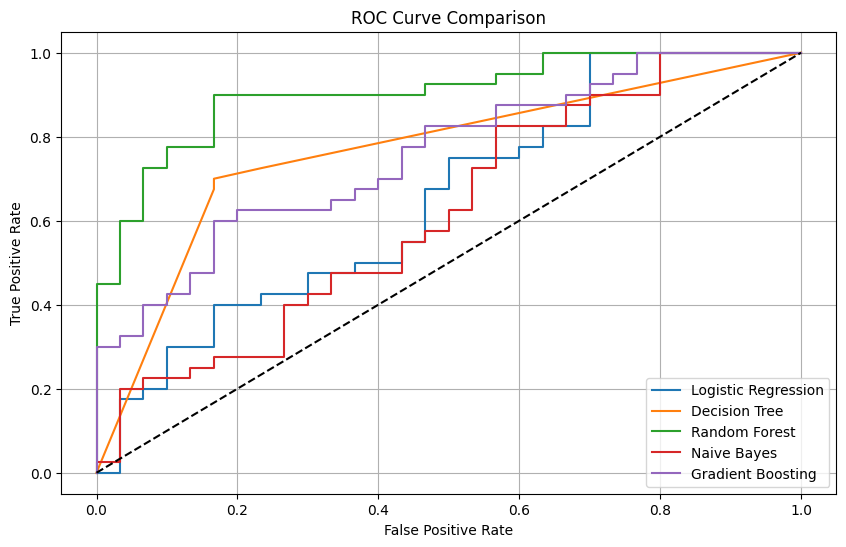

In [ ]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

for name, model in models.items():
    if "knn" not in name.lower():
        model.fit(X_train_scaled, y_train)
        if hasattr(model, "predict_proba"):
            y_proba = model.predict_proba(X_test_scaled)[:, 1]
            fpr, tpr, _ = roc_curve(y_test, y_proba)
            plt.plot(fpr, tpr, label=f"{name}")

plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Comparison")
plt.legend()
plt.grid()
plt.show()


In [ ]:
import pandas as pd
feature_importances = pd.Series(rf_model.feature_importances_, index=X.columns)
print(feature_importances.sort_values(ascending=False))


Age                         0.359203
Gender_Male                 0.102192
Fever                       0.089759
Cholesterol Level_Normal    0.088288
Cough                       0.076184
Blood Pressure_Normal       0.074387
Difficulty Breathing        0.065363
Fatigue                     0.064153
Cholesterol Level_Low       0.053151
Blood Pressure_Low          0.027318
dtype: float64


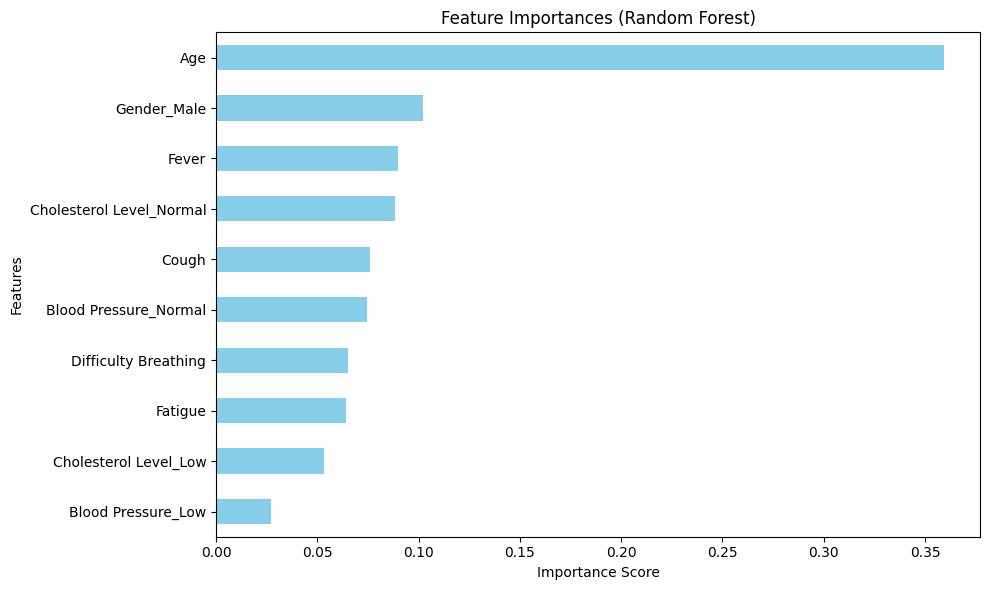

In [ ]:
import matplotlib.pyplot as plt

feature_importances.sort_values().plot(kind='barh', figsize=(10,6), color='skyblue')
plt.title("Feature Importances (Random Forest)")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.tight_layout()
plt.show()
